1. Load the dataset
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records,
    structure of the file, number of attributes,types of attributes and a general idea of likely challenges in the dataset. 
    Mention a few comments in this regard (5 points)
3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics 
    such as central values, spread, tails, relationships between variables etc. mention your observations (15 points)

In [30]:
# Importing the libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier , StackingClassifier

sns.set_style(style = 'whitegrid')


In [2]:
# Importing the Dataset as 'data'

data = pd.read_csv('Data - Parkinsons.data')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
# Getting the Count, mean, std, min, 25%, 50%, 75%, max values

data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [4]:
# Extracting the Column type and Null value count.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
# Finding for any columns which have values as '?'

columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)','MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 
            'Jitter:DDP','MDVP:Shimmer', 'MDVP:Shimmer(dB)','Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 
            'NHR', 'HNR',  'RPDE', 'DFA','spread1', 'spread2', 'D2', 'PPE']

for n in columns:
    val = data[n] == '?'
    
    print(val.value_counts())
    
# No columns with the values as '?'

False    195
Name: MDVP:Fo(Hz), dtype: int64
False    195
Name: MDVP:Fhi(Hz), dtype: int64
False    195
Name: MDVP:Flo(Hz), dtype: int64
False    195
Name: MDVP:Jitter(%), dtype: int64
False    195
Name: MDVP:Jitter(Abs), dtype: int64
False    195
Name: MDVP:RAP, dtype: int64
False    195
Name: MDVP:PPQ, dtype: int64
False    195
Name: Jitter:DDP, dtype: int64
False    195
Name: MDVP:Shimmer, dtype: int64
False    195
Name: MDVP:Shimmer(dB), dtype: int64
False    195
Name: Shimmer:APQ3, dtype: int64
False    195
Name: Shimmer:APQ5, dtype: int64
False    195
Name: MDVP:APQ, dtype: int64
False    195
Name: Shimmer:DDA, dtype: int64
False    195
Name: NHR, dtype: int64
False    195
Name: HNR, dtype: int64
False    195
Name: RPDE, dtype: int64
False    195
Name: DFA, dtype: int64
False    195
Name: spread1, dtype: int64
False    195
Name: spread2, dtype: int64
False    195
Name: D2, dtype: int64
False    195
Name: PPE, dtype: int64


c:\users\dgandra\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [6]:
# Shape of the dataset

data.shape

(195, 24)

In [7]:
# Extracting the names of the Each column.

data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

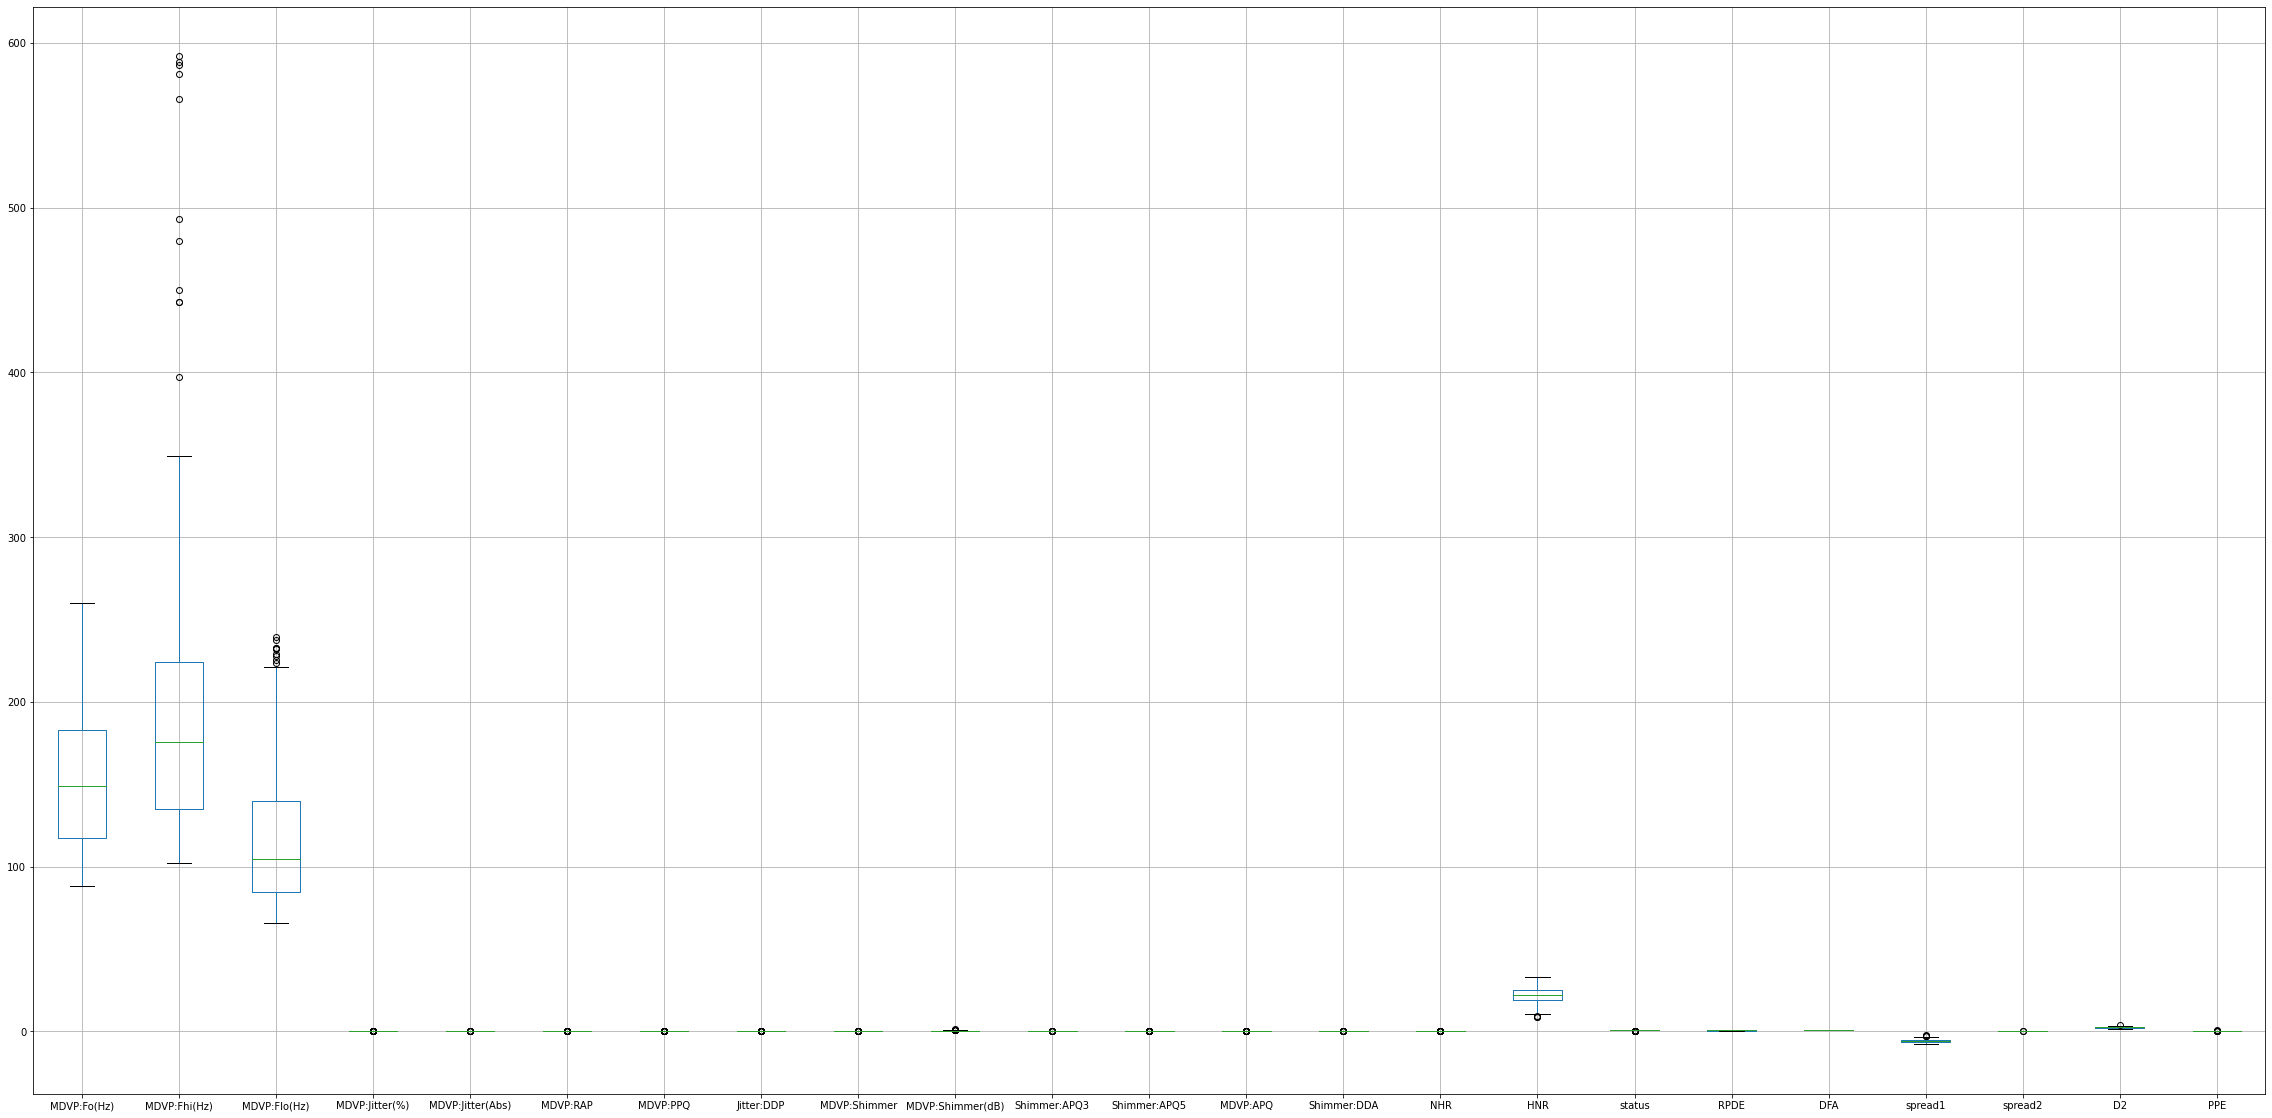

In [8]:
# Boxplot of Each columns

plt.figure(figsize=(40,20))
data.boxplot(column = [ 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','MDVP:Jitter(%)',
                        'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP','MDVP:Shimmer',
                        'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ','Shimmer:DDA',
                        'NHR', 'HNR', 'status', 'RPDE', 'DFA','spread1', 'spread2', 'D2', 'PPE']);

# There are outiers in most of the columns.

In [9]:
# Finding the Q1, Q3, median, mean

Q1 = data.quantile(0.25)
Median = data.quantile(0.50)
Q3 = data.quantile(0.75)

print('First Quartile : ')
print(Q1)
print(' ')
print('Median : ')
print(Median)
print(' ')
print('Third Quartile : ')
print(Q3)

First Quartile : 
MDVP:Fo(Hz)         117.572000
MDVP:Fhi(Hz)        134.862500
MDVP:Flo(Hz)         84.291000
MDVP:Jitter(%)        0.003460
MDVP:Jitter(Abs)      0.000020
MDVP:RAP              0.001660
MDVP:PPQ              0.001860
Jitter:DDP            0.004985
MDVP:Shimmer          0.016505
MDVP:Shimmer(dB)      0.148500
Shimmer:APQ3          0.008245
Shimmer:APQ5          0.009580
MDVP:APQ              0.013080
Shimmer:DDA           0.024735
NHR                   0.005925
HNR                  19.198000
status                1.000000
RPDE                  0.421306
DFA                   0.674758
spread1              -6.450096
spread2               0.174351
D2                    2.099125
PPE                   0.137451
Name: 0.25, dtype: float64
 
Median : 
MDVP:Fo(Hz)         148.790000
MDVP:Fhi(Hz)        175.829000
MDVP:Flo(Hz)        104.315000
MDVP:Jitter(%)        0.004940
MDVP:Jitter(Abs)      0.000030
MDVP:RAP              0.002500
MDVP:PPQ              0.002690
Jitter:DDP   

In [10]:
IQR = Q3 - Q1
print('Interquartile range : ')
print(IQR)

Interquartile range : 
MDVP:Fo(Hz)         65.197000
MDVP:Fhi(Hz)        89.343000
MDVP:Flo(Hz)        55.727500
MDVP:Jitter(%)       0.003905
MDVP:Jitter(Abs)     0.000040
MDVP:RAP             0.002175
MDVP:PPQ             0.002095
Jitter:DDP           0.006520
MDVP:Shimmer         0.021380
MDVP:Shimmer(dB)     0.201500
Shimmer:APQ3         0.012020
Shimmer:APQ5         0.012800
MDVP:APQ             0.016320
Shimmer:DDA          0.036060
NHR                  0.019715
HNR                  5.877500
status               0.000000
RPDE                 0.166256
DFA                  0.087124
spread1              1.403904
spread2              0.104883
D2                   0.537330
PPE                  0.115529
dtype: float64


In [11]:
# Upper boundary values for all the columns

max_value = Q3 + 1.5*IQR
max_value


MDVP:Fo(Hz)         280.564500
MDVP:Fhi(Hz)        358.220000
MDVP:Flo(Hz)        223.609750
MDVP:Jitter(%)        0.013222
MDVP:Jitter(Abs)      0.000120
MDVP:RAP              0.007097
MDVP:PPQ              0.007098
Jitter:DDP            0.021285
MDVP:Shimmer          0.069955
MDVP:Shimmer(dB)      0.652250
Shimmer:APQ3          0.038295
Shimmer:APQ5          0.041580
MDVP:APQ              0.053880
Shimmer:DDA           0.114885
NHR                   0.055212
HNR                  33.891750
status                1.000000
RPDE                  0.836947
DFA                   0.892567
spread1              -2.940336
spread2               0.436559
D2                    3.442452
PPE                   0.426273
dtype: float64

In [12]:
# Lower boundary values for all the columns

min_value = Q1 - 1.5*IQR
min_value

MDVP:Fo(Hz)         19.776500
MDVP:Fhi(Hz)         0.848000
MDVP:Flo(Hz)         0.699750
MDVP:Jitter(%)      -0.002397
MDVP:Jitter(Abs)    -0.000040
MDVP:RAP            -0.001602
MDVP:PPQ            -0.001283
Jitter:DDP          -0.004795
MDVP:Shimmer        -0.015565
MDVP:Shimmer(dB)    -0.153750
Shimmer:APQ3        -0.009785
Shimmer:APQ5        -0.009620
MDVP:APQ            -0.011400
Shimmer:DDA         -0.029355
NHR                 -0.023648
HNR                 10.381750
status               1.000000
RPDE                 0.171921
DFA                  0.544072
spread1             -8.555952
spread2              0.017025
D2                   1.293130
PPE                 -0.035842
dtype: float64

In [13]:
# As the 'Name' is considered as Noise removing the column

data.drop(columns = ['name'],inplace = True)
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [14]:
# Target variable 'status'

data['status'].value_counts()

# 48 people are healthy
# 147 people are not healthy(Parkinson's)

1    147
0     48
Name: status, dtype: int64

In [15]:
# Making an columns list.

columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)','MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 
            'Jitter:DDP','MDVP:Shimmer', 'MDVP:Shimmer(dB)','Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 
            'NHR', 'HNR', 'RPDE', 'DFA','spread1', 'spread2', 'D2', 'PPE']


In [16]:
# Making upper Boundary outliers to '0' and replacing that with 'median' for all columns.

for f in columns:
    outliers_index = data[data[f] > max_value[f]][f].index
    data.loc[outliers_index,f] = 0
    data.loc[outliers_index,f] = data[f].median()
    

# Making lower Boundary outliers to '0' and replacing that with 'median' for all columns.

for f in columns:
    outliers_index1 = data[data[f] < min_value[f]][f].index
    data.loc[outliers_index1,f] = 0
    data.loc[outliers_index1,f] = data[f].median()

In [17]:
# Corelation for all the numeric columns with absolute values.

corr_matrix = data.corr().abs()
corr_matrix

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.843755,0.365646,0.342585,0.522098,0.228740,0.326472,0.228831,0.201812,0.212334,...,0.157797,0.143097,0.084866,0.383535,0.383894,0.446013,0.467136,0.248453,0.172248,0.465890
MDVP:Fhi(Hz),0.843755,1.000000,0.202928,0.205038,0.389653,0.112091,0.154930,0.112147,0.103822,0.098877,...,0.102312,0.005025,0.019112,0.289156,0.209096,0.437467,0.336200,0.160927,0.197016,0.324832
MDVP:Flo(Hz),0.365646,0.202928,1.000000,0.382540,0.293853,0.364238,0.367854,0.364032,0.254888,0.291734,...,0.160933,0.400265,0.260089,0.167177,0.351830,0.174643,0.304895,0.115409,0.073665,0.284827
MDVP:Jitter(%),0.342585,0.205038,0.382540,1.000000,0.759491,0.898668,0.836357,0.898676,0.530370,0.580751,...,0.476481,0.543834,0.499864,0.365305,0.375329,0.282101,0.606980,0.307585,0.179768,0.663474
MDVP:Jitter(Abs),0.522098,0.389653,0.293853,0.759491,1.000000,0.680949,0.721699,0.681228,0.515202,0.532144,...,0.565075,0.342096,0.540976,0.385228,0.403678,0.381649,0.687276,0.389573,0.189696,0.736154
MDVP:RAP,0.228740,0.112091,0.364238,0.898668,0.680949,1.000000,0.804844,0.999998,0.497077,0.551406,...,0.451179,0.578705,0.492073,0.309454,0.297335,0.221873,0.478061,0.163204,0.171567,0.528871
MDVP:PPQ,0.326472,0.154930,0.367854,0.836357,0.721699,0.804844,1.000000,0.804825,0.501226,0.558204,...,0.444091,0.480899,0.541026,0.331681,0.398720,0.271143,0.555240,0.261168,0.157783,0.619588
Jitter:DDP,0.228831,0.112147,0.364032,0.898676,0.681228,0.999998,0.804825,1.000000,0.497217,0.551457,...,0.451371,0.578619,0.492365,0.309618,0.297392,0.221872,0.478394,0.163320,0.171846,0.529188
MDVP:Shimmer,0.201812,0.103822,0.254888,0.530370,0.515202,0.497077,0.501226,0.497217,1.000000,0.947658,...,0.893143,0.542886,0.727869,0.375073,0.447886,0.165374,0.553997,0.374959,0.361017,0.595890
MDVP:Shimmer(dB),0.212334,0.098877,0.291734,0.580751,0.532144,0.551406,0.558204,0.551457,0.947658,1.000000,...,0.851188,0.569861,0.678718,0.366799,0.419100,0.173987,0.521032,0.366682,0.337696,0.563484


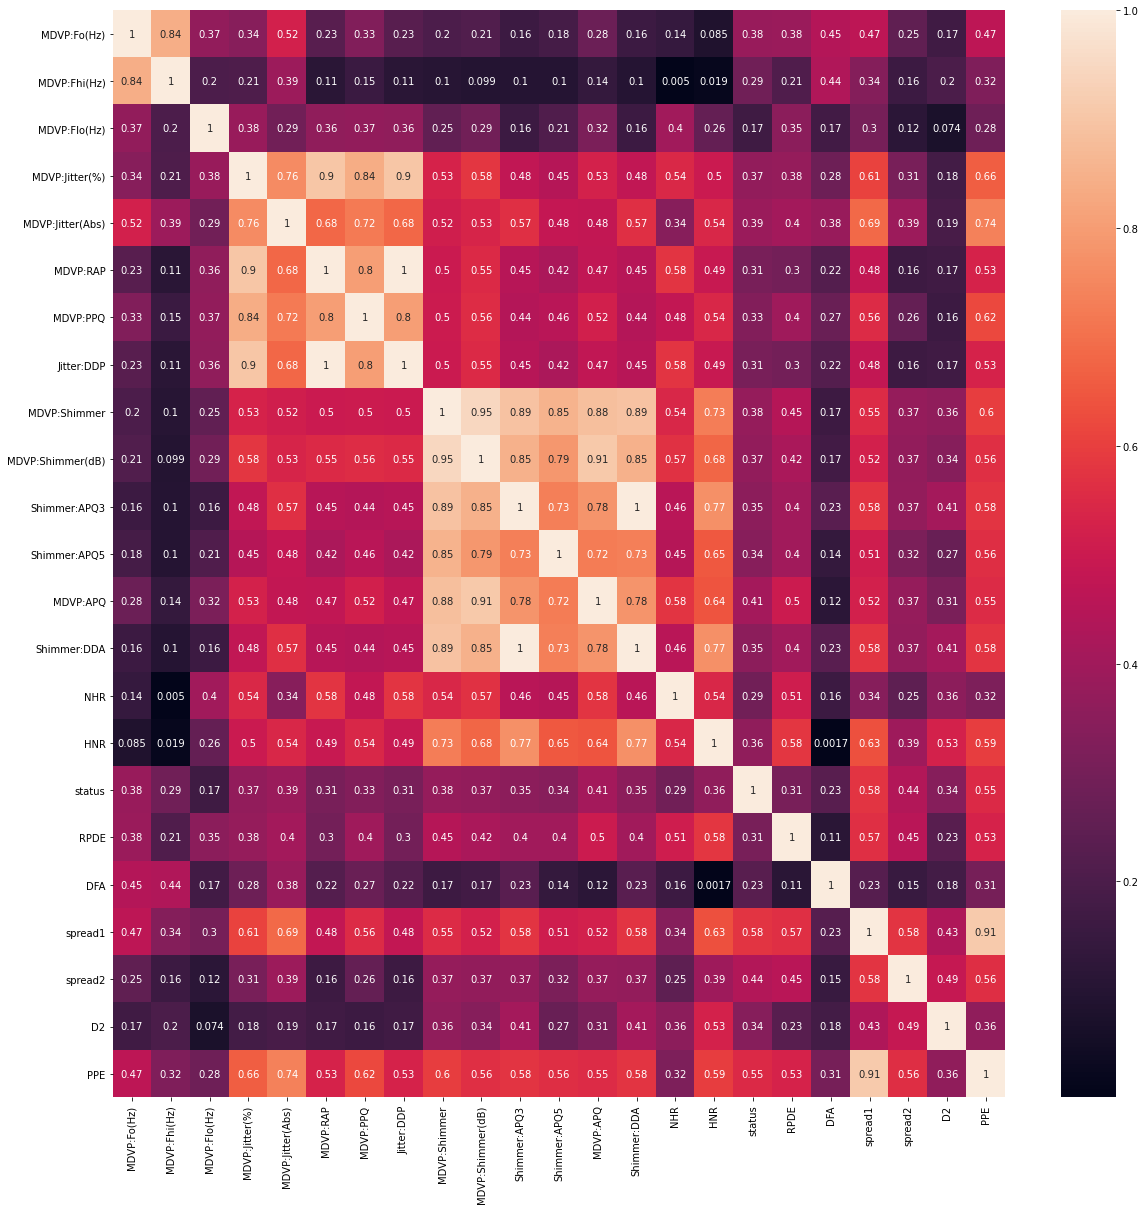

In [18]:
# Heatmap of the coorelation data.

plt.figure(figsize= (20,20))
sns.heatmap(data.corr().abs(),annot = True);

In [19]:
# Getting the coorelated data of the dataset and getting the one side matrix to analyse better

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k = 1).astype(np.bool))
upper

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),NaN,0.843755,0.365646,0.342585,0.522098,0.228740,0.326472,0.228831,0.201812,0.212334,...,0.157797,0.143097,0.084866,0.383535,0.383894,0.446013,0.467136,0.248453,0.172248,0.465890
MDVP:Fhi(Hz),NaN,NaN,0.202928,0.205038,0.389653,0.112091,0.154930,0.112147,0.103822,0.098877,...,0.102312,0.005025,0.019112,0.289156,0.209096,0.437467,0.336200,0.160927,0.197016,0.324832
MDVP:Flo(Hz),NaN,NaN,NaN,0.382540,0.293853,0.364238,0.367854,0.364032,0.254888,0.291734,...,0.160933,0.400265,0.260089,0.167177,0.351830,0.174643,0.304895,0.115409,0.073665,0.284827
MDVP:Jitter(%),NaN,NaN,NaN,NaN,0.759491,0.898668,0.836357,0.898676,0.530370,0.580751,...,0.476481,0.543834,0.499864,0.365305,0.375329,0.282101,0.606980,0.307585,0.179768,0.663474
MDVP:Jitter(Abs),NaN,NaN,NaN,NaN,NaN,0.680949,0.721699,0.681228,0.515202,0.532144,...,0.565075,0.342096,0.540976,0.385228,0.403678,0.381649,0.687276,0.389573,0.189696,0.736154
MDVP:RAP,NaN,NaN,NaN,NaN,NaN,NaN,0.804844,0.999998,0.497077,0.551406,...,0.451179,0.578705,0.492073,0.309454,0.297335,0.221873,0.478061,0.163204,0.171567,0.528871
MDVP:PPQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.804825,0.501226,0.558204,...,0.444091,0.480899,0.541026,0.331681,0.398720,0.271143,0.555240,0.261168,0.157783,0.619588
Jitter:DDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.497217,0.551457,...,0.451371,0.578619,0.492365,0.309618,0.297392,0.221872,0.478394,0.163320,0.171846,0.529188
MDVP:Shimmer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.947658,...,0.893143,0.542886,0.727869,0.375073,0.447886,0.165374,0.553997,0.374959,0.361017,0.595890
MDVP:Shimmer(dB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.851188,0.569861,0.678718,0.366799,0.419100,0.173987,0.521032,0.366682,0.337696,0.563484


In [20]:
# Getting the columns which has coorelation more than 0.80

to_drop = [column for column in upper.columns if any (upper[column] > 0.80) ]

In [21]:
# Columns which has colreation more than 0.80

to_drop

['MDVP:Fhi(Hz)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'PPE']

In [22]:
# Removing the most corelated data

data.drop(to_drop, axis = 1, inplace = True)

In [23]:
# Extracting the data columns after removing corelated data.

data.head()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:Shimmer,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2
0,119.992,74.997,0.00784,0.00007,0.04374,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,113.819,0.00968,0.00008,0.06134,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,111.555,0.01050,0.00009,0.05233,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,111.366,0.00997,0.00009,0.05492,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,110.655,0.01284,0.00011,0.06425,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180


<Figure size 1440x1440 with 0 Axes>

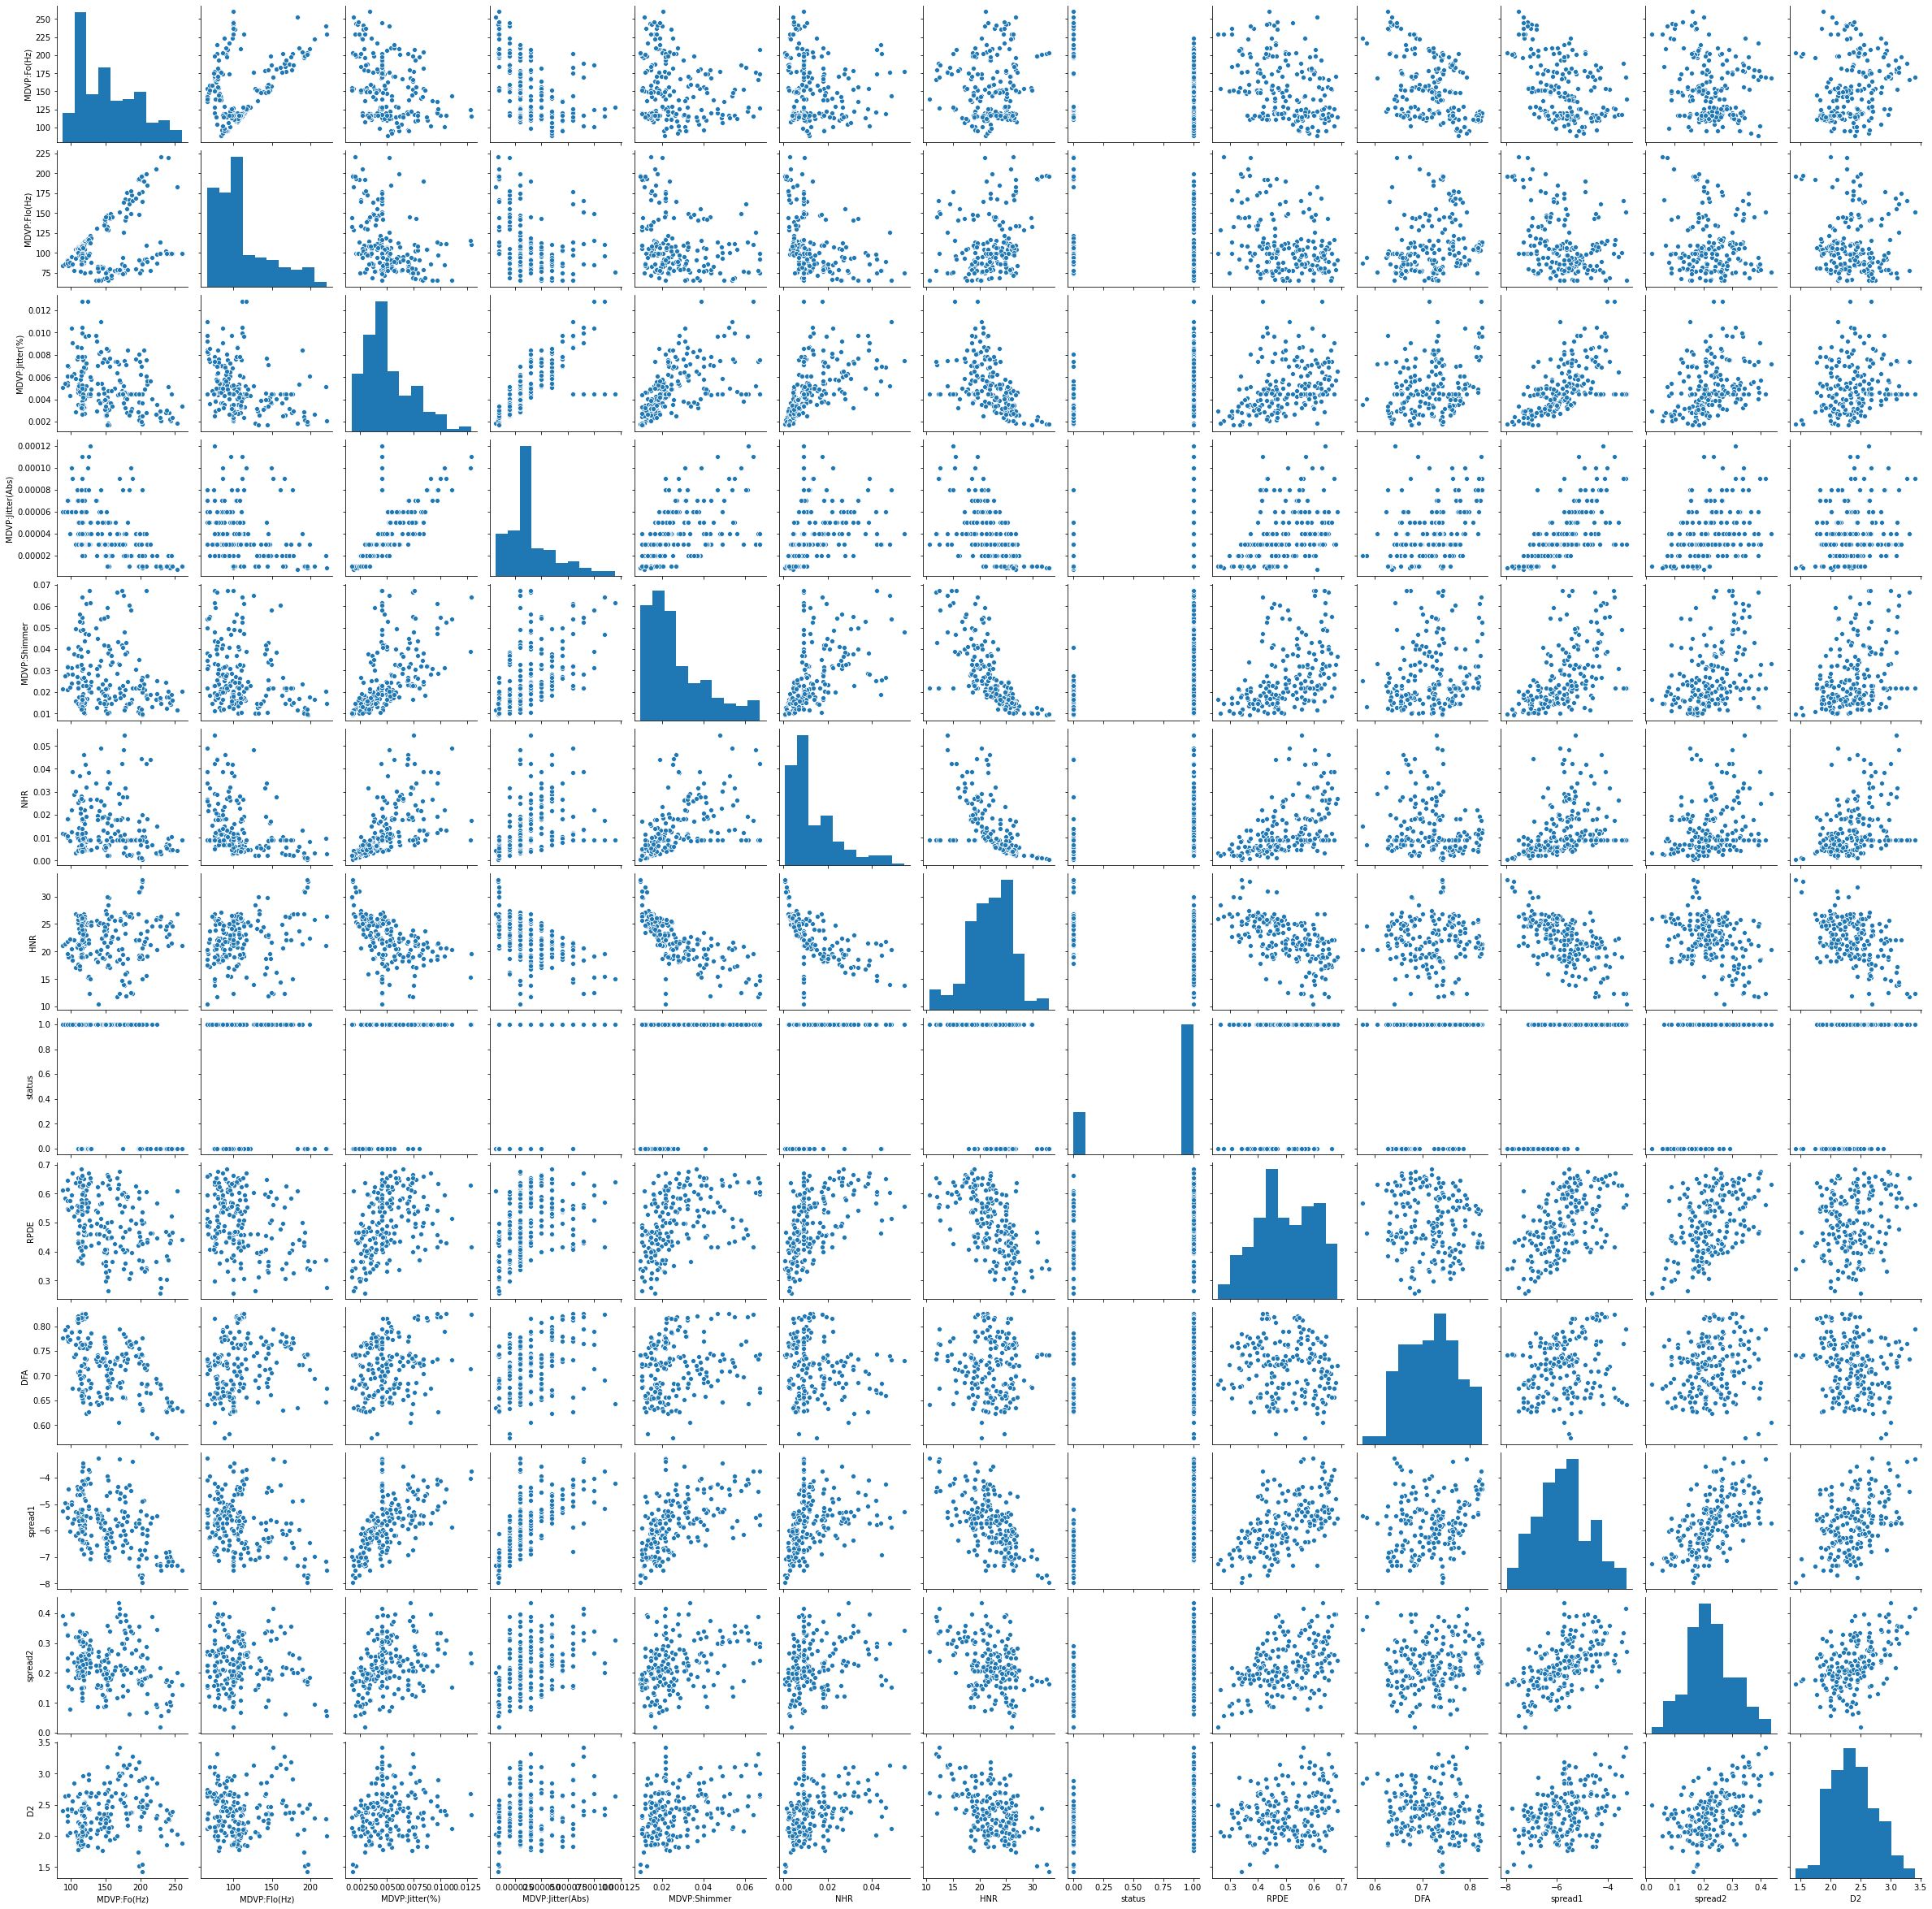

In [24]:
# Pairplot of All the columns

plt.figure(figsize = (20,20))
sns.pairplot(data);


In [25]:
data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
       'MDVP:Shimmer', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2'],
      dtype='object')

In [26]:
# Numeric columns : MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:Shimmer,NHR,HNR,RPDE,DFA,spread1,spread2,D2

# Categorical column : status(Target column)

# values 0 to 0.5 and 0 to -0.5 are not skewed. 
# values 0.5 to 1.0 and -0.5 to -1.0 are moderately skewed.
# values 1.0 & above and  -1.0  & less are highly skewed.

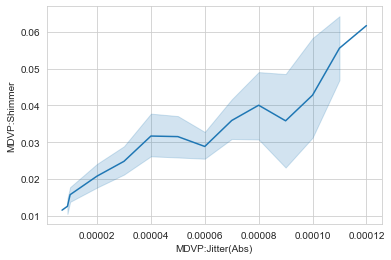

In [31]:
# Distrubution of MDVP:Jitter(Abs), MDVP:Shimmer

sns.lineplot(data['MDVP:Jitter(Abs)'],data['MDVP:Shimmer']);

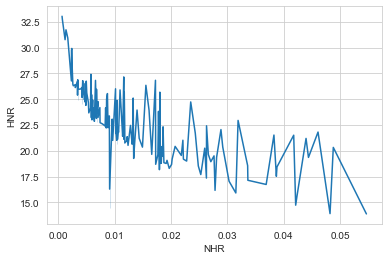

In [113]:
# Distrubution of NHR, HNR

sns.lineplot(data['NHR'],data['HNR']);

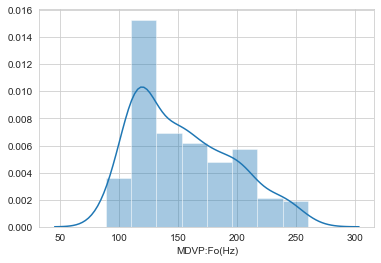

In [32]:
# Distrubution of all the columns

# column : MDVP:Fo(Hz)

sns.distplot(data['MDVP:Fo(Hz)']);

In [33]:
# The skewness of MDVP:Fo(Hz)

data['MDVP:Fo(Hz)'].skew()

# The skewness is moderately skewed

0.5917374636540784

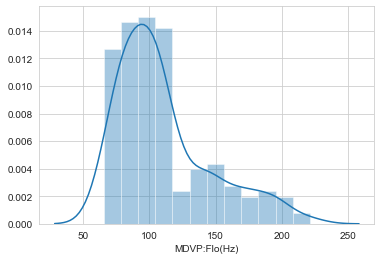

In [34]:
# column : MDVP:Flo(Hz)

sns.distplot(data['MDVP:Flo(Hz)']);

In [35]:
# The skewness MDVP:Flo(Hz)

data['MDVP:Flo(Hz)'].skew()

# skewness is very high

1.1723552210942105

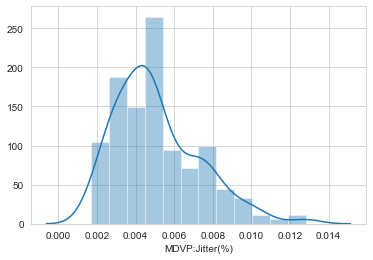

In [36]:
# column : MDVP:Jitter(%)

sns.distplot(data['MDVP:Jitter(%)']);


In [37]:
# The skewness MDVP:Jitter(%)

data['MDVP:Jitter(%)'].skew()

# skewness is moderate

0.9289684903949966

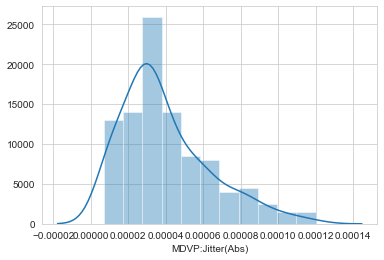

In [38]:
# column : MDVP:Jitter(Abs)

sns.distplot(data['MDVP:Jitter(Abs)']);


In [39]:
# The skewness MDVP:Jitter(Abs)

data['MDVP:Jitter(Abs)'].skew()

# skewness is ver high

1.0198295142472755

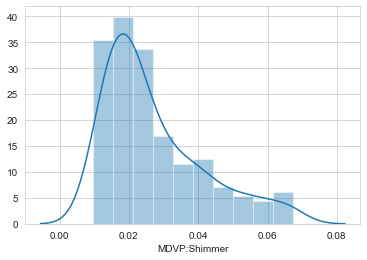

In [40]:
# column : MDVP:Shimmer

sns.distplot(data['MDVP:Shimmer']);

In [41]:
# The skewness MDVP:Shimmer

data['MDVP:Shimmer'].skew()

# skewness is very high

1.1394632272653784

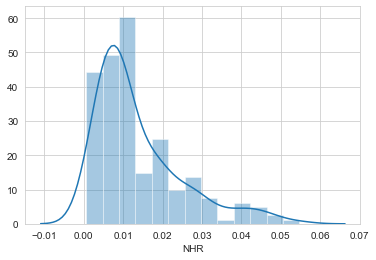

In [42]:
# column : NHR

sns.distplot(data['NHR']);

In [43]:
# The skewness NHR

data['NHR'].skew()

# skewness is ver high

1.4671549110706459

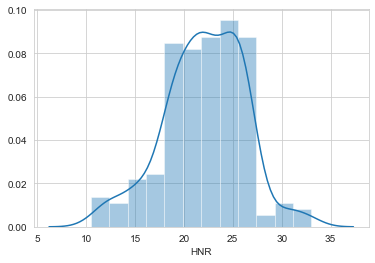

In [44]:
# column : HNR

sns.distplot(data['HNR']);

In [45]:
# The skewness HNR

data['HNR'].skew()

# skewness is null and symmertric

-0.2986250183465717

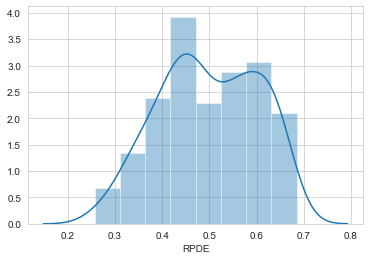

In [46]:
# column : RPDE

sns.distplot(data['RPDE']);

In [47]:
# The skewness RPDE

data['RPDE'].skew()

# skewness is null and symmertric

-0.14340241379821705

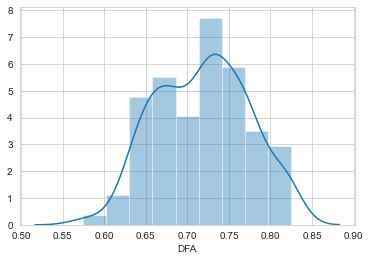

In [48]:
# column : DFA

sns.distplot(data['DFA']);

In [49]:
# The skewness DFA

data['DFA'].skew()

# skewness is null and symmertric

-0.03321366071383484

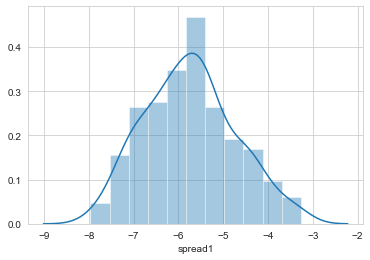

In [50]:
# column : spread1

sns.distplot(data['spread1']);

In [51]:
# The skewness spread1

data['spread1'].skew()

# skewness is null and symmertric

0.22482575514089675

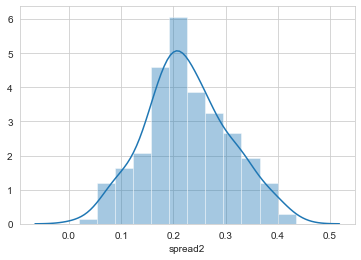

In [52]:
# column : spread2

sns.distplot(data['spread2']);

In [53]:
# The skewness spread2

data['spread2'].skew()

# skewness is null and symmertric

0.16024206179181044

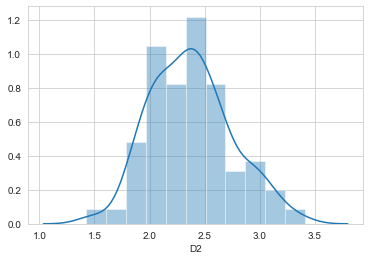

In [54]:
# column : D2

sns.distplot(data['D2']);

In [55]:
# The skewness D2

data['D2'].skew()

# skewness is null and symmertric

0.3082737454523233

In [56]:
# Numeric columns : MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:Shimmer,NHR,HNR,RPDE,DFA,spread1,spread2,D2

# Categorical column : status(Target column)

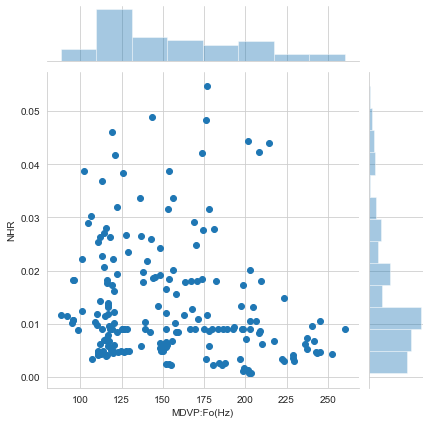

In [57]:
# Jointplot of MDVP:Fo(Hz), MDVP:Flo(Hz) columns.

sns.jointplot(x = data['MDVP:Fo(Hz)'],y = data['NHR']);

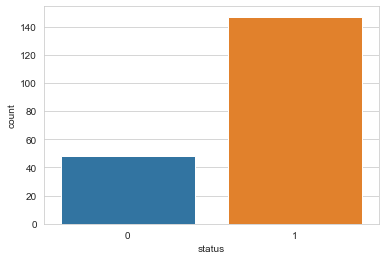

In [58]:
# barplot of status column

sns.countplot(data['status']);

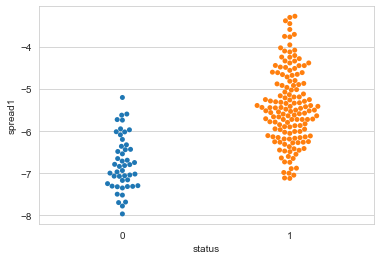

In [59]:
# Swarmplot between status and spread1

sns.swarmplot(data['status'],data['spread1']);

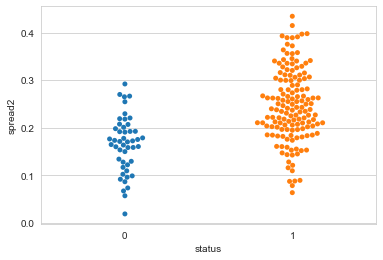

In [60]:
# Swarmplot between status and spread2

sns.swarmplot(data['status'],data['spread2']);

4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test)
5. Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc
6. Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data

Logistic Regression

In [61]:
# Copying the dataframe 'data' to 'logistic_data'

logistic_data = data.copy()

In [62]:
# Exploring the dataframe

logistic_data.head()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:Shimmer,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2
0,119.992,74.997,0.00784,0.00007,0.04374,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,113.819,0.00968,0.00008,0.06134,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,111.555,0.01050,0.00009,0.05233,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,111.366,0.00997,0.00009,0.05492,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,110.655,0.01284,0.00011,0.06425,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180


In [63]:
# Splitting the dataframe into logistic_x and logistic_y

logistic_x = logistic_data[['MDVP:Fo(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:Shimmer','NHR','HNR','RPDE','DFA','spread1','spread2','D2']]
logistic_y = logistic_data['status']

In [64]:
# Splitting the data into X_train, X_test, y_train, y_test

Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(logistic_x, logistic_y, test_size=0.30, random_state=42)

In [65]:
# Fitting the logistic regression model.

model_logistic = LogisticRegression()

model_logistic.fit(Xlog_train,ylog_train)

c:\users\dgandra\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
# model score for the training data

model_logistic.score(Xlog_train,ylog_train)

0.8602941176470589

In [67]:
# model score for the testing data

model_logistic.score(Xlog_test,ylog_test)

0.864406779661017

In [68]:
# As the score(accuracy) on the training set and testing set is same. The model fitted perfectly.

In [69]:
# Predicting the values for the Xlog_test

y_predict_logistic = model_logistic.predict(Xlog_test)

In [70]:
# confusion Matrix for the y_predict_logistic and ylog_test

pd.DataFrame(confusion_matrix(y_predict_logistic,ylog_test),index = ['predict 0','predict 1'],columns = ['actual 0','actual 1'])

,actual 0,actual 1
predict 0,9,2
predict 1,6,42


In [71]:
# Classification report of the y_predict, y_test

print(classification_report(y_predict_logistic,ylog_test))

              precision    recall  f1-score   support

           0       0.60      0.82      0.69        11
           1       0.95      0.88      0.91        48

    accuracy                           0.86        59
   macro avg       0.78      0.85      0.80        59
weighted avg       0.89      0.86      0.87        59



Knn

In [72]:
# Making copy of original dataframe 'loan' to 'knn_loan'.

knn_data = data.copy()
knn_data.head()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:Shimmer,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2
0,119.992,74.997,0.00784,0.00007,0.04374,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,113.819,0.00968,0.00008,0.06134,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,111.555,0.01050,0.00009,0.05233,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,111.366,0.00997,0.00009,0.05492,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,110.655,0.01284,0.00011,0.06425,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180


In [73]:
# Splitting the data into X_knn and y_knn.

X_knn = knn_data[['MDVP:Fo(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:Shimmer','NHR','HNR','RPDE','DFA','spread1','spread2','D2']]
y_knn = knn_data['status']

In [74]:
# As we are using knn. The data schould be normalized so, we normalizing the data using zscore.


X_scaled = X_knn.apply(zscore)
X_scaled.head()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:Shimmer,NHR,HNR,RPDE,DFA,spread1,spread2,D2
0,-0.829300,-0.997031,1.249371,1.294226,1.163633,0.755074,-0.257086,-0.807838,1.760814,0.929123,0.500364,-0.198852
1,-0.770972,0.100206,2.084069,1.716397,2.389755,0.500294,-0.731544,-0.387524,1.837562,1.664985,1.363166,0.301687
2,-0.909476,0.036218,2.456054,2.138569,1.762064,-0.059861,-0.350127,-0.662075,1.942048,1.297984,1.058324,-0.088663
3,-0.909622,0.030876,2.215624,2.138569,1.942499,-0.020108,-0.351832,-0.613134,1.832380,1.622790,1.345150,0.082208
4,-0.925657,0.010781,3.517571,2.982912,2.592483,0.353931,-0.594175,-0.783021,1.909364,1.991513,0.101237,-0.115872


In [75]:
# Splitting the data into training and testing data. Training 70% and testing 30%

Xknn_train, Xknn_test, yknn_train, yknn_test = train_test_split(X_scaled, y_knn, test_size=0.30, random_state=42)

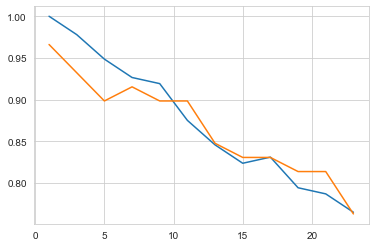

In [76]:
# To get the best values of 'k' iteration is used.
# the model has highest accuracy are considered as the best 'k'.

# Checking the accuracy of the train data 

sns.set_style('whitegrid')
scores_train =  [ ]
for n in range(1,25,2):
    knn = KNeighborsClassifier(n_neighbors = n )
    knn.fit(Xknn_train,yknn_train)
    scores_train.append(knn.score(Xknn_train,yknn_train))
    

# Checking the accuracy of the test data

scores_test =  [ ]
for n in range(1,25,2):
    knn = KNeighborsClassifier(n_neighbors = n )
    knn.fit(Xknn_train,yknn_train)
    scores_test.append(knn.score(Xknn_test,yknn_test))

plt.plot(range(1,25,2),scores_train);
plt.plot(range(1,25,2),scores_test);

In [77]:
print('At k = 3 the score of train data is around 97%')
print(' ')
print('At k = 3 the score of test data is around 93%')

At k = 3 the score of train data is around 97%
 
At k = 3 the score of test data is around 93%


In [78]:
# fitting the train data with the value of k = 3

knn1 = KNeighborsClassifier(n_neighbors = 3 )
knn1.fit(Xknn_train,yknn_train)

KNeighborsClassifier(n_neighbors=3)

In [79]:
# calculating the score for the train data

knn1.score(Xknn_train,yknn_train)

0.9779411764705882

In [80]:
# calculating the score for the test data

knn1.score(Xknn_test,yknn_test)

0.9322033898305084

In [81]:
# Predicted values for X_test values and the finding the score of y_predict and X_test.

y_predict_knn = knn1.predict(Xknn_test)

In [82]:
# confusion Matrix for the yknn_predict and yknn_test

pd.DataFrame(confusion_matrix(y_predict_knn,yknn_test),index = ['predict 0','predict 1'],columns = ['actual 0','actual 1'])


,actual 0,actual 1
predict 0,13,2
predict 1,2,42


In [83]:
# Classification report of the y_predict, y_test

print(classification_report(y_predict_knn,yknn_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.95      0.95      0.95        44

    accuracy                           0.93        59
   macro avg       0.91      0.91      0.91        59
weighted avg       0.93      0.93      0.93        59



Naive Bayes

In [84]:
# Making copy of original dataframe 'loan' to 'logistic_loan'.

naive_data = data.copy()
naive_data.head()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:Shimmer,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2
0,119.992,74.997,0.00784,0.00007,0.04374,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,113.819,0.00968,0.00008,0.06134,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,111.555,0.01050,0.00009,0.05233,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,111.366,0.00997,0.00009,0.05492,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,110.655,0.01284,0.00011,0.06425,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180


In [85]:
# Splitting of the data into X_naive and y_naive.

X_naive = naive_data[['MDVP:Fo(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:Shimmer','NHR','HNR','RPDE','DFA','spread1','spread2','D2']]
y_naive = naive_data['status']


In [86]:
# Splitting the data into training and testing data. Training 70% and testing 30%

X2_train, X2_test, y2_train, y2_test = train_test_split(X_naive, y_naive, test_size=0.30, random_state=42)

In [87]:
naivebayes = GaussianNB()

In [88]:
# fitiing the train data into our model.

naivebayes.fit(X2_train,y2_train)

GaussianNB()

In [89]:
# Getting the Score of the model with training data.

train_set2 = naivebayes.score(X2_train,y2_train)
print('Accuracy for the Training set is {} %'.format(train_set2*100))


Accuracy for the Training set is 77.94117647058823 %


In [90]:
# Getting the Score of the model with testing data.

test_set2 = naivebayes.score(X2_test,y2_test)
print('Accuracy for the Testing set is {} %'.format(test_set2*100))
print(' ')
print('As the Accuracy for the Training and the Testing set is almost same. model is perfect with no overfitting or underfitting')

Accuracy for the Testing set is 84.7457627118644 %
 
As the Accuracy for the Training and the Testing set is almost same. model is perfect with no overfitting or underfitting


In [91]:
# Predicted values for X2_test values.

y2_predict = naivebayes.predict(X2_test)

In [92]:
# confusion Matrix for the y_predict and y_test

pd.DataFrame(confusion_matrix(y2_predict,y2_test),index = ['predict 0','predict 1'],columns = ['actual 0','actual 1'])

,actual 0,actual 1
predict 0,10,4
predict 1,5,40


In [93]:
# Classification report of the y2_predict, y2_test

print(classification_report(y2_predict,y2_test))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.91      0.89      0.90        45

    accuracy                           0.85        59
   macro avg       0.79      0.80      0.79        59
weighted avg       0.85      0.85      0.85        59



7. Train a meta-classifier and note the accuracy on test data (10 points)

In [94]:
# Copying the data 

stack_data = data.copy()

In [95]:
# Splitting of the data into X_stack and y_stack.

X_stack = stack_data[['MDVP:Fo(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:Shimmer','NHR','HNR','RPDE','DFA','spread1','spread2','D2']]
y_stack = stack_data['status']

Xstack_train, Xstack_test, ystack_train, ystack_test = train_test_split(X_stack, y_stack, test_size=0.30, random_state=42)

In [96]:
# Getting the base learner

base_learners = [('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),('rf_2', KNeighborsClassifier(n_neighbors=5))]


In [97]:
# Initialize Stacking Classifier 

clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [98]:
# Fitting the data

clf.fit(Xstack_train, ystack_train)

StackingClassifier(estimators=[('rf_1',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('rf_2', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [99]:
# getting the score of the training data

clf.score(Xstack_train,ystack_train)

0.9852941176470589

In [100]:
# getting the score of the testing data

clf.score(Xstack_test,ystack_test)

0.8813559322033898

8. Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy (10 points)

In [101]:
# copy from the dataset 

random_data = data.copy()

In [102]:
# Choosing of the data.

X_random = random_data[['MDVP:Fo(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:Shimmer','NHR','HNR','RPDE','DFA','spread1','spread2','D2']]
y_random = random_data['status']

In [103]:
# splitting the dataframe

Xran_train, Xran_test, yran_train, yran_test = train_test_split(X_random, y_random, test_size=0.30, random_state=42)

In [104]:
# Create the model with 100 trees

model = RandomForestClassifier(n_estimators=100, max_depth = 4,
                               bootstrap = True,
                               max_features = 'sqrt')

In [105]:
# fitting with train data

model.fit(Xran_train, yran_train)

RandomForestClassifier(max_depth=4, max_features='sqrt')

In [106]:
# Getting the score of the training data

model.score(Xran_train, yran_train)

0.9926470588235294

In [107]:
# Getting the score of the testing data

model.score(Xran_test, yran_test)

0.9152542372881356

In [108]:
# predicting the values for Xbag_train

prediction_random = model.predict(Xran_test)

In [109]:
# confusing matrix 

pd.DataFrame(confusion_matrix(prediction_random,yran_test),index = ['predict 0','predict 1'],columns = ['actual 0','actual 1'])

,actual 0,actual 1
predict 0,10,0
predict 1,5,44


In [110]:
# Classification report of the y2_predict, y2_test

print(classification_report(prediction_random,yran_test))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.90      0.95        49

    accuracy                           0.92        59
   macro avg       0.83      0.95      0.87        59
weighted avg       0.94      0.92      0.92        59



9. Compare all the models (minimum 5) and pick the best one among them (10 points)

In [111]:
print('The score of logistic regression for training data is 86% and testing data is 86% ')
print(' ')
print('The score of KNN for training data is 97% and testing data 93%')
print( ' ')
print('The score of naive bayes for training data is 77% and testing data is  85%')
print(' ')
print('The score of stacking for training data is 98% and testing data is 88% ')
print(' ')
print('The score of random forest for training data is 99% and testing data is 92% ')

The score of logistic regression for training data is 86% and testing data is 86% 
 
The score of KNN for training data is 97% and testing data 93%
 
The score of naive bayes for training data is 77% and testing data is  85%
 
The score of stacking for training data is 98% and testing data is 88% 
 
The score of random forest for training data is 99% and testing data is 92% 


In [112]:
print('As the score for the training data and testing data is better for knn than the other models. so, we can consider as the best model')

As the score for the training data and testing data is better for knn than the other models. so, we can consider as the best model
